#**Composition d'un système à l'état final**

##Objectif : déterminer l'avancement à l'équilibre dans le cas d'une transformation modélisée par une unique réaction.

###*Import des bibiothèques*

* Importer le module `math` pour faire des opérations mathématiques de base ;

* importer `scipy.optimize` qui est une bibliothèque permettant de faire un certain nombre de calculs et de résoudre également des équations.

###*Méthode de dichotomie*

* Soit $f$ une fonction continue et monotone sur $[a,b]$ ; On cherche une valeur de $x$ notée $x_{e}$ qui annule la fonction $f$ dans cet intervalle à epsilon près ;

* On appelle c le milieu de l'intervalle $[a,b]$ et on cherche dans quelle moitié de l'intervalle se trouve la solution et ainsi de suite ; on crée une boucle jusqu'à trouver le plus petit intervalle (à epsilon près) auquel appartient $x_{e}$.

* Auparavant, il faut réécrire l'équation de Gulberg et Waage sous la forme $f(x_e)=0$. Les bornes a et b sont choisies assez simplement puisque l'avancement est borné (ici $0 \leq x_e \leq x_{max}$). Pour la précision, on prend $\epsilon=1\cdot 10^{-10} \, mol L^{-1}$.


In [5]:
#Renseigner les paramètres du problème

K=10**(8)                  #Constante d'équilibre thermodynamique 

#importation des bibliothèques
from math import *
import numpy as np

def f(x):
  return -1+K*(0.005-x)*(0.010-2*x)**2     #Réécriture de l'équation issue de la relation de Guldberg et Waage

#recherche des solutions d'une équation par dichotomie

def dichotomie(f,a,b,epsilon):
  if f(a)*f(b)>0:
    return None
  else:
    while (b-a)>=epsilon:
      c=(a+b)/2
      if f(b)*f(c)<=0:
        a=c
      else:
        b=c
    return c
x_e = dichotomie(f,0,0.05,1E-10)
print('Avancement équilibre x_e=',round(x_e,10), 'mol L^-1')

Avancement équilibre x_e= 0.0036427912 mol L^-1


###*Méthode de Newton*

* On souhaite approcher la solution d'une équation de la forme $f(x) = 0$ selon la méthode de Newton. Pour cela, on considère le développement de Taylor de la fonction $f$ au premier ordre et on approche la fonction par sa tangente.

* On considère un point d'abscisse $x_0$ de l'intervalle de définition de $f$ proche du zéro à trouver. La tangente à la courbe représentative de $f$ en ce point a pour équation $y = f(x_0) + (x - x_0)f'(x_0)$.

* En supposant $f'(x) \ne 0$, cette tangente coupe l'axe des abscisses en $x_1 = x_0 - \dfrac{f(x_0)}{f'(x_0)}$. Il est raisonnable de penser que  $x_1$ est beaucoup plus proche de la solution recherchée que $x_0$.

* On réitère ainsi le procédé à partir de $x_1$ ce qui permet de construire, par récurrence, une suite $x_n$ telle que $x_{n+1}=x_n- \dfrac{f(x_n)}{f'(x_n)}$.

* La suite $x_n$ converge vers la solution de $f(x)=0$ (sauf si $x_n$ n'appartient pas au domaine de définition de $f$ ou si la dérivée $f'(x_n)$ est nulle.) La figure ci-dessous illustre la méthode de Newton.

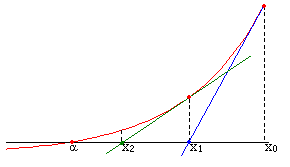

In [4]:
#Renseigner les paramètres du problème

K=10**(8)                  #Constante d'équilibre thermodynamique ; ici la constante choisie est celle de la réaction de CH3COOH avec l'eau ;

#importation des bibliothèques
from math import *
import numpy as np

def f(x):
  return K*(0.005-x)*(0.010-2*x)**2-1     #Réécriture de l'équation issue de la relation de Guldberg et Waag

def Newton(f,x0,epsilon1=1e-10,h=1e-5):
  x = x0                                      #Initialisation
  while abs(f(x)) > epsilon1:                 #Tant que |f(x)| > epsilon choisi
    df = (f(x+h) - f(x)) / h                  #df est la dérivée de la fonction f en x_n par taux d’accroissement
    x = x - f(x)/df                           #nouvelle valeur x_{n+1} de x
  return x
x_e = Newton(f,0,1e-10,1e-4)
print('avancement équilibre x_e=',round(x_e,4), 'mol L^-1')

avancement équilibre x_e= 0.0036 mol L^-1
